이름 : 고가연

학번 : 19016002

**시험중 외부 사이트는 [Tensorflow API](https://www.tensorflow.org/api_docs/python/tf/keras)만 참조 가능합니다.  
크롬 창에는 Tensorflow API와 시험 문제 두가지 탭만 떠 있어야 하며 다른 사이트가 떠 있을경우는 부정행위로 간주됩니다.  
OBS로 시험중 화면을 녹화합니다.  
퇴실할 때는 답안지를 이름_학번.ipynb 형식으로 저장후 캔버스에 업로드합니다.  
녹화영상도 이름_학번.mp4 형식으로 저장후 손을 들어 감독자의 usb에 옮겨담습니다.  
난이도 下 5점, 난이도 中 10점, 난이도 上 15점입니다.  
총 300점입니다.**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 1. CNN (100점)

싸이킷런에 내장되어 있는 불향각 사진과 데이지 사진을 불러오겠습니다.

(427, 640, 3)


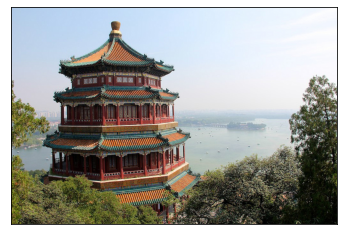

In [2]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')/255
print(china.shape)

plt.imshow(china)
plt.xticks([])
plt.yticks([])
plt.show()

(427, 640, 3)


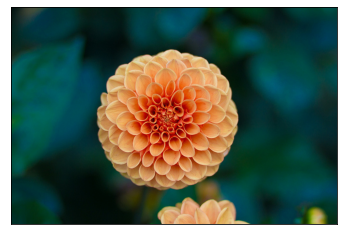

In [3]:
flower = load_sample_image('flower.jpg')/255
print(flower.shape)

plt.imshow(flower)
plt.xticks([])
plt.yticks([])
plt.show()

**1-1. (10점) 데이지 사진을 RGB 채널별로 각각 분리해서 출력하시오.**

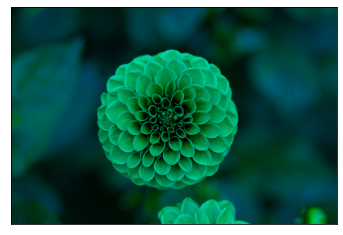

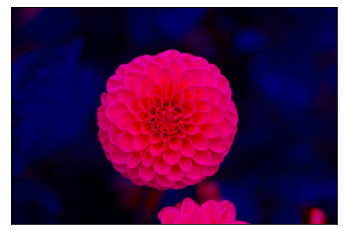

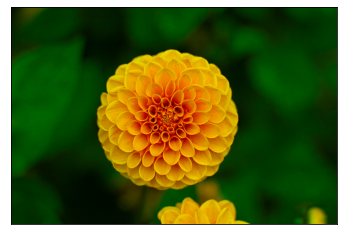

In [14]:
for i in range(3):
  tmp = flower.copy()
  tmp[:,:,i] = 0
  plt.imshow(tmp)
  plt.xticks([])
  plt.yticks([])
  plt.show()

**1-2. (5점) 두 사진을 묶어서 N$\times$H$\times$W$\times$C 포맷의 4차원 텐서로 만드시오. shape을 출력하시오.**

In [15]:
images = np.array([china, flower])
print(images.shape)

(2, 427, 640, 3)


**1-3. (10점) 수평 Sobel필터 $\begin{pmatrix}1&2&1\\0&0&0\\-1&-2&-1\end{pmatrix}$와 수직 Sobel필터 $\begin{pmatrix}1&0&-1\\2&0&-2\\1&0&-1\end{pmatrix}$를 생각하자. 수평 Sobel 필터 3개와 수직 Sobel 필터 3개를 각각 묶은 후 두 묶음을 다시 묶으시오. 텐서플로우의 필터 포맷인 FH$\times$FW$\times$C$\times$FN으로 축의 위치를 바꿔주시오. shape을 출력하시오.**

In [16]:
filter_h = [[1,2,1], [0,0,0], [-1,-2,-1]]
filters_h = np.array([filter_h, filter_h, filter_h])
filter_v = [[1,0,-1], [2,0,-2], [1,0,-1]]
filters_v = np.array([filter_v, filter_v, filter_v])
filters = np.array([filters_h, filters_v])

filters = filters.transpose(2,3,1,0)

print(filters.shape)

(3, 3, 3, 2)


**1-4. (10점) 함수 [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)를 이용해 스트라이드 1, 노 패딩으로 합성곱을 하시오. 행은 N, 열은 FN인 2$\times$2 바둑판 형태로 출력하시오.**

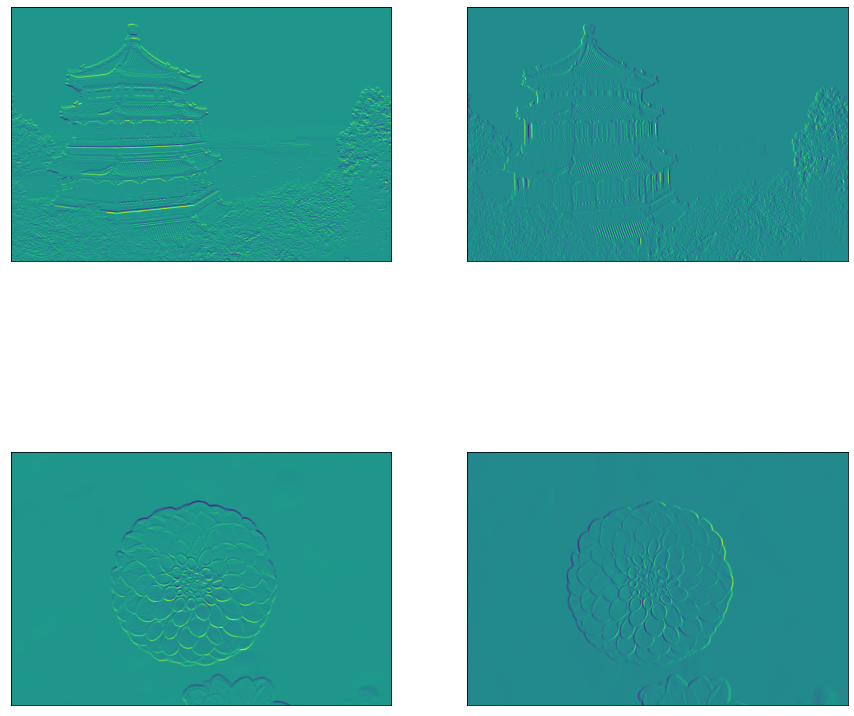

In [17]:
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = 'VALID')

plt.figure(figsize = (15, 15))
for i in (0,1):
  for j in (0,1):
    plt.subplot(2, 2, 2*i+j+1)
    plt.imshow(outputs[i, :,:, j])
    plt.xticks([])
    plt.yticks([])
plt.show()

**1-5. (10점) 함수 [tf.nn.max_pool2d](https://www.tensorflow.org/api_docs/python/tf/nn/max_pool2d)를 이용해 필터 크기 5, 스트라이드 5, 노 패딩으로 max pooling을 하시오. 두 이미지를 차례로 출력하시오.**

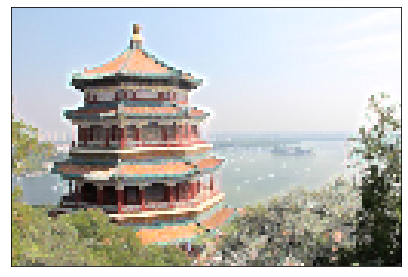

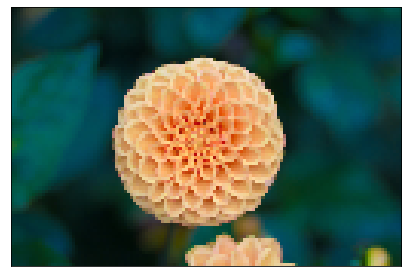

In [21]:
outputs = tf.nn.max_pool2d(images, ksize=5, strides = 5, padding = 'VALID')

for i in (0,1):
  plt.figure(figsize = (7, 7))
  plt.imshow(outputs[i, :,:,:])
  plt.xticks([])
  plt.yticks([])
plt.show()

클래스 [tf.keras.layers.Conv2d](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)와 [tf.keras.layers.MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)를 불러옵니다.

In [22]:
from keras.layers import Conv2D, MaxPool2D

**1-6. (10점) 랜덤하게 생성된 3$\times$3 필터 9개, 스트라이드 1, 패딩은 해상도가 유지되도록 잡아서 합성곱을 한후 Relu를 적용하시오. 여기에 필터 크기 2, 스트라이드 2, 노 패딩으로 max pooling을 하시오. 불향각, 데이지 각각에 대해 출력된 9개의 이미지를 3$\times$3 바둑판 형태로 출력하시오.**

In [23]:
outputs = Conv2D(filters = 9,
                 kernel_size = 3,
                 strides = 1,
                 padding = 'same',
                 activation = 'relu')(images)
outputs = MaxPool2D(pool_size=2,
                    strides=2,
                    padding='valid')(outputs)

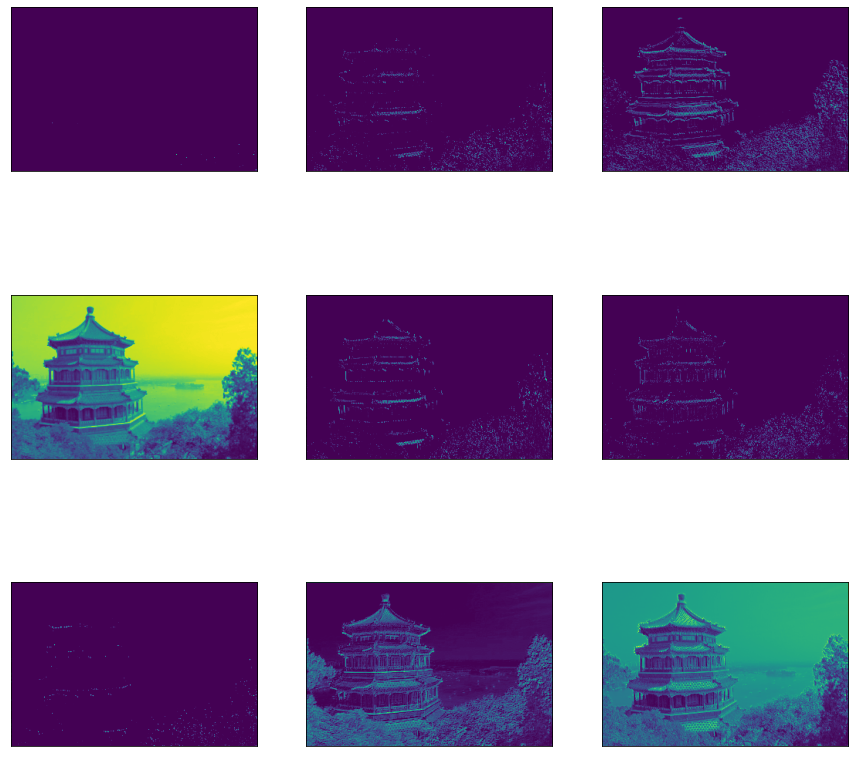

In [26]:
plt.figure(figsize = (15, 15))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(outputs[0, :,:,i])
  plt.xticks([])
  plt.yticks([])
plt.show()

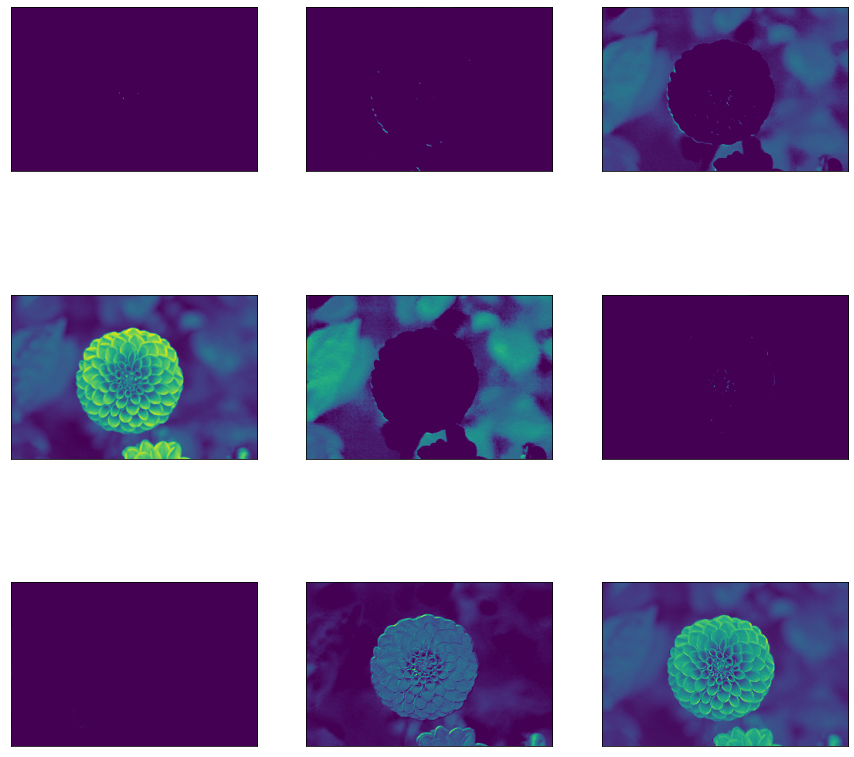

In [27]:
plt.figure(figsize = (15, 15))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(outputs[1, :,:,i])
  plt.xticks([])
  plt.yticks([])
plt.show()

CIFAR10 데이터셋을 불러온 후 32비트 실수형으로 바꿔주고 리스케일링 합니다.  
10개 라벨의 목록입니다.

In [78]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

**1-7. (5점) 훈련 이미지와 라벨, 테스트 이미지와 라벨의 shape을 각각 출력하시오.**

In [79]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**1-8. (5점) 훈련 데이터의 앞 25장을 5$\times$5 바둑판 형태로 출력하시오. 밑에는 영문 라벨을 표시하시오.**

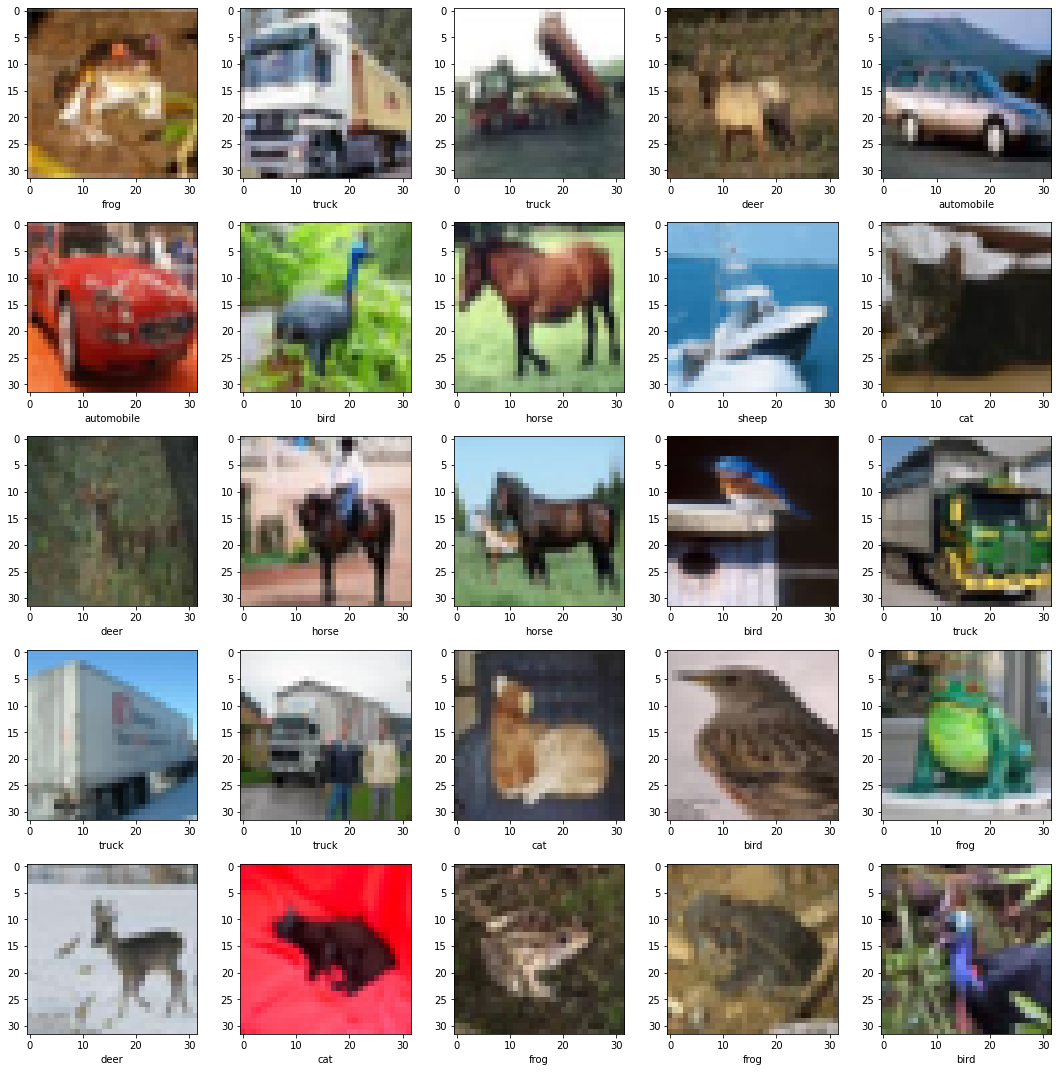

In [80]:
plt.figure(figsize = (15, 15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.tight_layout()
plt.show()

In [81]:
from keras.layers import Flatten, Dense

**1-9. (15점) 합성곱층 → Relu층 → max pooling층 → 합성곱층 → Relu층 → max pooling층 → 합성곱층 → Relu층 → flatten층 → Affine층 → softmax층의 구성을 가지는 CNN을 만들어 CIFAR10 데이터셋을 분류하려 한다. 합성곱층은 필터를 3$\times$3, 스트라이드 1, 노패딩으로 잡고 필터의 개수는 32, 64, 128개로 2배씩 늘려간다. max pooling층은 필터의 크기 2, 스트라이드 2, 노 패딩으로 잡는다. 함수형 API로 구성하시오.**

In [82]:
inputs = keras.Input(shape = train_images.shape[1:])

## 1
x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding='valid', activation = 'relu')(inputs)
x = MaxPool2D(pool_size=2, strides=2, padding='valid')(x)

## 2
x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding='valid', activation = 'relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='valid')(x)

## 3
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, padding='valid', activation = 'relu')(x)


x = Flatten()(x)
outputs = Dense(10, activation = 'softmax')(x)
model = keras.Model(inputs, outputs)

**1-10. (5점) 신경망의 요약된 정보를 출력하시오.**

In [83]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 128)         7385

**1-11. (5점) 옵티마이저는 RMSprop, 손실함수는 교차 엔트로피, 평가지표는 정확도로 학습설정을 하시오.**

In [84]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'acc')

**1-12. (5점) 배치크기는 64, 훈련회수는 5에퍽으로 훈련시키시오.**

In [85]:
history = model.fit(train_images, train_labels, batch_size = 64, epochs = 5)

Epoch 1/5
782/782 [==============================] - 4s 5ms/step - loss: 1.5970 - acc: 0.4251
Epoch 2/5
782/782 [==============================] - 3s 4ms/step - loss: 1.1999 - acc: 0.5797
Epoch 3/5
782/782 [==============================] - 4s 4ms/step - loss: 1.0221 - acc: 0.6457
Epoch 4/5
782/782 [==============================] - 4s 5ms/step - loss: 0.9066 - acc: 0.6872
Epoch 5/5
782/782 [==============================] - 4s 4ms/step - loss: 0.8195 - acc: 0.7165


**1-13. (5점) 테스트 데이터로 평가하시오.**

In [86]:
test_scores = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.1712 - acc: 0.6358


# 2. 입력 파이프라인 API (45점)

개와 고양이 이미지 데이터 셋을 다운받겠습니다.  
압축을 풀면 현재 작업디렉토리 밑에 cats_vs_dogs_small 디렉토리가 생성되고 그 밑에 train, validation, test 3개의 디렉토리가 생성됩니다.  
그 밑에 각각 cat과 dot 디렉토리가 생성되는데 그 안에 각각 고양이 사진과 강아지 사진이 있습니다.

In [46]:
!pip install --upgrade --no-cache-dir gdown

import gdown, zipfile, os
import matplotlib.image as img

if not os.path.isdir('cats_vs_dogs_small'):
    gdown.download(id='1z2WPTBUI-_Q2jZtcRtQL0Vxigh-z6dyW', output='cats_vs_dogs_small.zip')
    cats_vs_dogs_small = zipfile.ZipFile('cats_vs_dogs_small.zip')
    cats_vs_dogs_small.extractall()
    cats_vs_dogs_small.close()

print("train : "+os.listdir("./cats_vs_dogs_small/train/cat")[0]+" ~ "+os.listdir("./cats_vs_dogs_small/train/cat")[-1])
print("validation : "+os.listdir("./cats_vs_dogs_small/validation/cat")[0]+" ~ "+os.listdir("./cats_vs_dogs_small/validation/cat")[-1])
print("test : "+os.listdir("./cats_vs_dogs_small/test/cat")[0]+" ~ "+os.listdir("./cats_vs_dogs_small/test/cat")[-1])
print("train : "+os.listdir("./cats_vs_dogs_small/train/dog")[0]+" ~ "+os.listdir("./cats_vs_dogs_small/train/dog")[-1])
print("validation : "+os.listdir("./cats_vs_dogs_small/validation/dog")[0]+" ~ "+os.listdir("./cats_vs_dogs_small/validation/dog")[-1])
print("test : "+os.listdir("./cats_vs_dogs_small/test/dog")[0]+" ~ "+os.listdir("./cats_vs_dogs_small/test/dog")[-1])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


Downloading...
From: https://drive.google.com/uc?id=1z2WPTBUI-_Q2jZtcRtQL0Vxigh-z6dyW
To: /content/cats_vs_dogs_small.zip
100%|██████████| 114M/114M [00:00<00:00, 321MB/s] 


train : cat.792.jpg ~ cat.693.jpg
validation : cat.1440.jpg ~ cat.1184.jpg
test : cat.2208.jpg ~ cat.1845.jpg
train : dog.94.jpg ~ dog.243.jpg
validation : dog.1185.jpg ~ dog.1256.jpg
test : dog.1593.jpg ~ dog.1935.jpg


**2-1. (10점) 고양이 첫 훈련 이미지 25장을 5$\times$5 바둑판 형태로 출력하시오.**

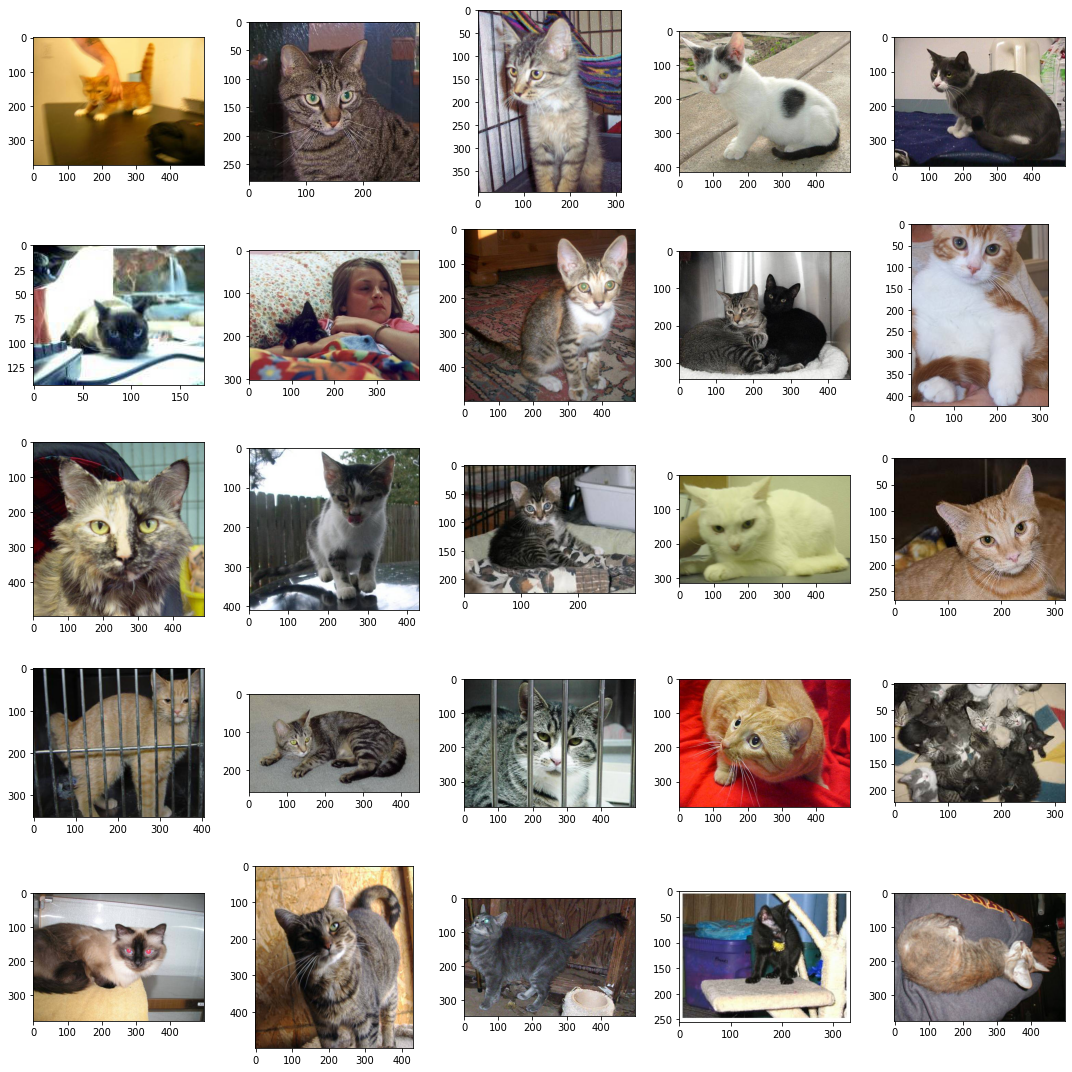

In [56]:
plt.figure(figsize = (15, 15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  tmp = img.imread(f'./cats_vs_dogs_small/train/cat/cat.{i}.jpg')
  plt.imshow(tmp)
plt.tight_layout()
plt.show()

In [47]:
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory

base_dir = pathlib.Path("cats_vs_dogs_small")

**2-2. (15점) [tf.keras.utils.image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory)을 사용해서 디렉토리로부터 데이터를 읽어들여 `Dataset`을 만드시오. 해상도는 180$\times$180으로 통일하고 입력데이터를 랜덤하게 섞은후 32개의 배치단위로 묶으시오. 고양이 이미지는 0, 강아지 이미지는 1로 라벨을 붙이시오.**

In [68]:
Dataset = image_dataset_from_directory(base_dir,
                                       labels = 'inferred',
                                       batch_size=32,
                                       image_size=(180, 180),
                                       shuffle=True,)

Found 5000 files belonging to 3 classes.


**2-3. (10점) 첫번째 배치묶음의 라벨들을 출력하시오.**

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

**2-4. (10점) 첫번째 배치묶음을 8$\times$4 바둑판 형태로 출력하시오. 이미지 밑에 라벨을 출력하시오..**

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(32):
  plt.subplot(8, 4, i+1)
  tmp = img.imread(f'./cats_vs_dogs_small/train/cat/cat.{i}.jpg')
  plt.imshow(tmp)
  plt.xlabel()
plt.tight_layout()
plt.show()

# 3. 데이터 증강 (55점)

In [74]:
from keras.layers import RandomFlip, RandomRotation, RandomZoom

**3-1. (10점) 랜덤하게 좌우대칭, 랜덤하게 -0.1×360° ~ 0.1×360°만큼 회전, 상하로 랜덤하게 -20% ~ 20% 확대하는 데이터 증강층을 Sequential API로 구성하시오.**

In [77]:
model_aug = tf.keras.Sequential()
model_aug.add(RandomFlip())
model_aug.add(RandomRotation((-0.1, 0.1)))
model_aug.add(RandomZoom((-0.2, 0.2)))

**3-2. (15점) 첫번째 배치묶음의 첫번째 이미지를 출력하시오. 25번 증강을 한후 5$\times$5 바둑판 형태로 출력하시오.**

In [ ]:
from keras.layers import MaxPooling2D, Rescaling, Dropout

**3-3. (15점) 증강층 → rescaling층 → 합성곱층 → Relu층 → max pooling층 → 합성곱층 → Relu층 → max pooling층 → 합성곱층 → Relu층 → max pooling층 → 합성곱층 → Relu층 → max pooling층 → 합성곱층 → Relu층 → flatten층 → dropout층 → Affine층 → sigmoid층의 구성을 가지는 CNN을 만들어 개와 고양이 사진들을 분류하려 한다. 합성곱층은 필터를 3$\times$3, 스트라이드 1, 노패딩으로 잡고 필터의 개수는 32, 64, 128, 256, 256개로 늘려간다. max pooling층은 필터의 크기 2, 스트라이드 2, 노 패딩으로 잡는다. dropout ratio는 0.5로 잡는다. 함수형 API로 구성하시오.**

In [ ]:
inputs = keras.Input(shape = train_images.shape[1:])

inputs = model_aug.fit(inputs)
Rescaling()


## 1
x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding='valid', activation = 'relu')(inputs)
x = MaxPool2D(pool_size=2, strides=2, padding='valid')(x)

## 2
x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding='valid', activation = 'relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='valid')(x)

## 3
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, padding='valid', activation = 'relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='valid')(x)

## 4
x = Conv2D(filters = 256, kernel_size = 3, strides = 1, padding='valid', activation = 'relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='valid')(x)

## 5
x = Conv2D(filters = 256, kernel_size = 3, strides = 1, padding='valid', activation = 'relu')(x)

x = Flatten()(x)
Dropout(0.5)
outputs = Dense(2, activation = 'softmax')(x)
model = keras.Model(inputs, outputs)

**3-4. (5점) 옵티마이저는 RMSprop, 손실함수는 교차 엔트로피, 평가지표는 정확도로 학습설정을 하시오.**

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'acc')

**3-5. (5점) 50에퍽동안 훈련시키시오. 검증 데이터로 모니터링 하시오.**

In [ ]:
history = model.fit(train_images, train_labels, batch_size = 64, epochs = 50)

**3-6. (5점) 테스트 데이터로 평가하시오.**

In [ ]:
test_scores = model.evaluate(test_images, test_labels)

# 4. VGG (35점)

VGG16 모델을 불러오겠습니다.  
1,000개의 라벨 목록도 만들었습니다.  
데이지 이미지를 리스케일링하지 않은 상태로 다시 불러옵니다.

In [87]:
vgg16 = keras.applications.vgg16.VGG16()

if not os.path.isfile('VGG16_test.zip'):
    gdown.download(id='11LZAFSFVtDsdKdLcFR9E-MaDoar6C3R5', output='VGG16_test.zip')
    VGG16_test = zipfile.ZipFile('VGG16_test.zip')
    VGG16_test.extractall()
    VGG16_test.close()

with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
    
flower = load_sample_image('flower.jpg')

553467096/553467096 [==============================] - 16s 0us/step


Downloading...
From: https://drive.google.com/uc?id=11LZAFSFVtDsdKdLcFR9E-MaDoar6C3R5
To: /content/VGG16_test.zip
100%|██████████| 338k/338k [00:00<00:00, 81.4MB/s]


**4-1. (5점) VGG16 모델의 요약된 정보를 출력하시오.**

In [88]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**4-2. (10점) [tf.image.resize](https://www.tensorflow.org/api_docs/python/tf/image/resize)를 사용해 데이지 이미지의 해상도를 VGG16의 입력 해상도에 맞추시오. [tf.keras.applications.vgg16.preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)을 사용해 VGG16에 맞는 데이터 전처리를 하시오. VGG16 모델이 예측하는 1,000차원 확률분포를 출력하시오.**

**4-3. (10점) 톱 5의 클래스 이름과 확률을 출력하시오.**

**4-4. (10점) 2위가 bee인 이유를 설명하시오.**

설명 : 

# 5. 전이학습 (65점)

**5-1. (15점) VGG16 모델을 다시 불러오되 분류기를 잘라내시오. 입력 해상도를 180$\times$180으로 변경하고 파라미터를 동결하시오.**

**5-2. (15점) 데이터 증강 층(3-1) → 파라미터가 동결된 VGG16의 특성 추출기(5-1) → 이진 분류기 순으로 신경망을 구성하시오. 이진분류기는 flatten층 → Affine층 →  dropout층 → affine층 → sigmoid층의 구성을 가지도록 만들어 개와 고양이 사진들을 분류하려 한다. 이진 분류기의 은닉층의 뉴런수는 256, dropout ratio는 0.5로 잡는다. 함수형 API로 구성하시오.**

In [ ]:
x = Flatten()(x)
outputs = Dense(2, activation = 'softmax')(x)
Dropout(0.5)
model = keras.Model(inputs, outputs)

**5-3. (5점) 옵티마이저는 RMSprop, 손실함수는 교차 엔트로피, 평가지표는 정확도로 학습설정을 하시오.**

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'acc')

**5-4. (5점) 10에퍽동안 훈련시키시오. 검증 데이터로 모니터링 하시오.**

In [ ]:
history = model.fit(train_images, train_labels, batch_size = 64, epochs = 10)

**5-5. (10점) 마지막 4개층의 동결을 해제하시오.**

**5-6. (5점) 옵티마이저는 RMSprop, 손실함수는 교차 엔트로피, 평가지표는 정확도로 학습설정을 하시오. RMSProp의 학습률은 $10^{-5}$으로 설정하시오.**

In [ ]:
model.compile(optimizer = tf.keras.optimizers.experimental.RMSprop(learning_rate = 1e-5),
              loss = 'binary_crossentropy',
              metrics = 'acc')

**5-7. (5점) 5에퍽동안 미세조정을하시오. 검증 데이터로 모니터링 하시오.**

**5-8. (5점) 테스트 데이터로 평가하시오.**

In [ ]:
test_scores = model.evaluate(test_images, test_labels)